In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('darkgrid')

## Análises Iniciais

In [232]:
credit = pd.read_csv('src\credit_risk_dataset.csv')

In [233]:
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [234]:
credit.shape

(32581, 12)

In [235]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Verificando NANs

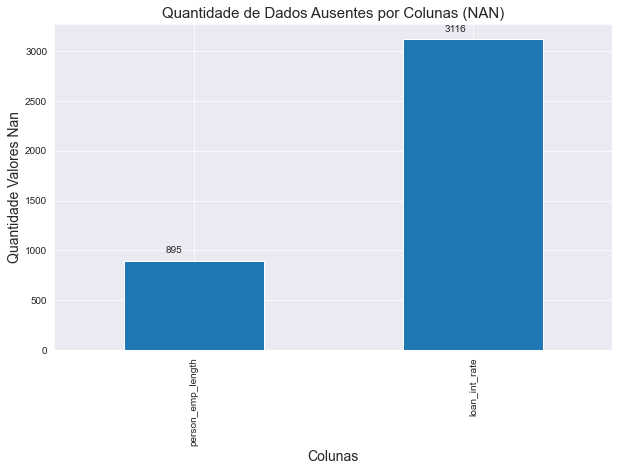

In [236]:
fig = plt.figure(figsize = (10,6))

missing = credit.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)

plot = missing.plot.bar()

plot.set_title("Quantidade de Dados Ausentes por Colunas (NAN)", fontdict={'fontsize':15})

plot.set_xlabel('Colunas', fontdict={'fontsize':14})

plot.set_ylabel('Quantidade Valores Nan', fontdict={'fontsize':14})

for i in range(missing.size):
    plt.annotate(missing.values[i], (-0.1 + i, missing.values[i] + 80))

plt.savefig('img/nan_data.png',  bbox_inches='tight')

In [237]:
var_with_nan = []
def verfify_nan_values(df):
    df_nan = pd.DataFrame()
    var_without_nan = []
    var_column = []
    var_percent = []
    total = df.shape[0]
    count = 0
    for index, value in df.isna().sum().iteritems():
        if value == 0:
            var_without_nan.append(index)
        else:
            percent_with_nan = (value / total) * 100
            var_with_nan.append(count)
            var_column.append(index)
            var_percent.append(percent_with_nan)
        count  = count + 1
    df_nan.insert(0, 'coluna', var_column, True)
    df_nan.insert(1, 'porcentagem_nan %', var_percent, True)

    return df_nan

In [238]:
credit_nan = verfify_nan_values(credit)

credit_nan

,coluna,porcentagem_nan %
0,person_emp_length,2.747000
1,loan_int_rate,9.563856


In [239]:
credit_without_nan = credit.fillna(credit.median())

C:\Users\DESKTOP\AppData\Local\Temp/ipykernel_8952/579044640.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credit_without_nan = credit.fillna(credit.median())


In [240]:
credit_nan = verfify_nan_values(credit_without_nan)

credit_nan

,coluna,porcentagem_nan %


In [241]:
credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [242]:
credit_without_nan.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Tipos de Variáveis

In [243]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [244]:
credit.loan_status.value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [245]:
quant = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

quali = [
    'loan_status',
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file'
]

In [246]:
credit_quant = credit_without_nan[quant]

### QUANTITATIVAS

In [300]:
credit_total = credit_without_nan.copy()

#### Outiliers

In [248]:
def plot_box_plot(df):
    Features = df.columns
    for i in range(len(Features)):
        plt.figure(figsize = (10,6))
        sns.boxplot(y = df[Features[i]], data = df)
        plt.title(f"Boxplot de {Features[i]}")
        plt.tight_layout()

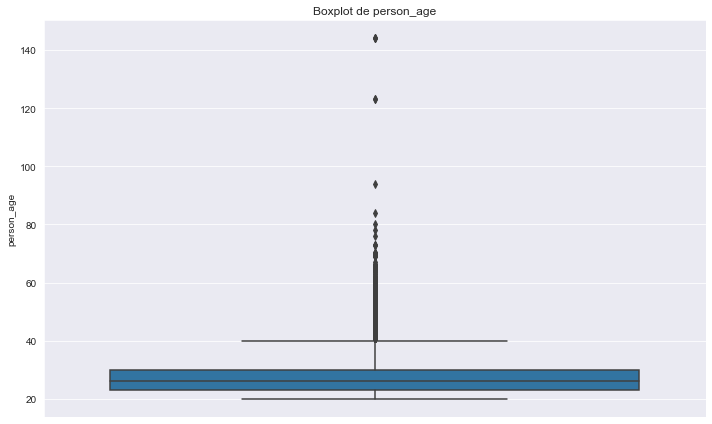

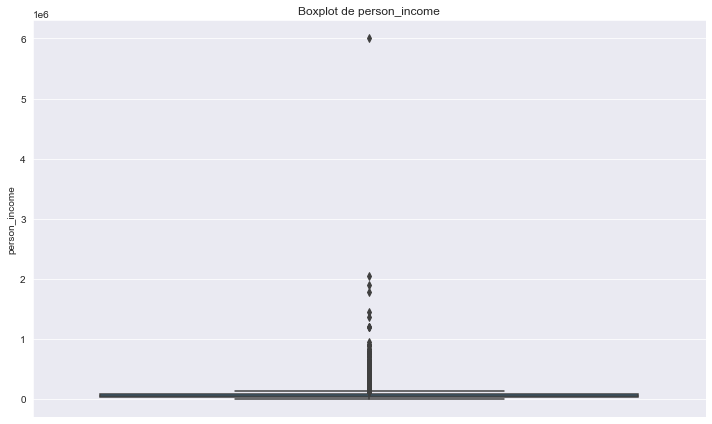

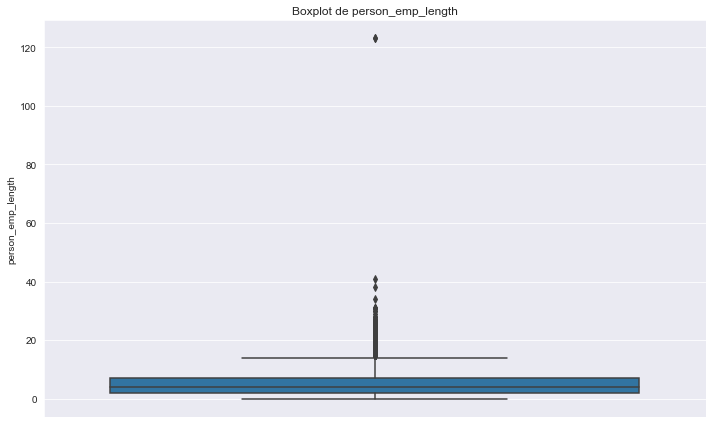

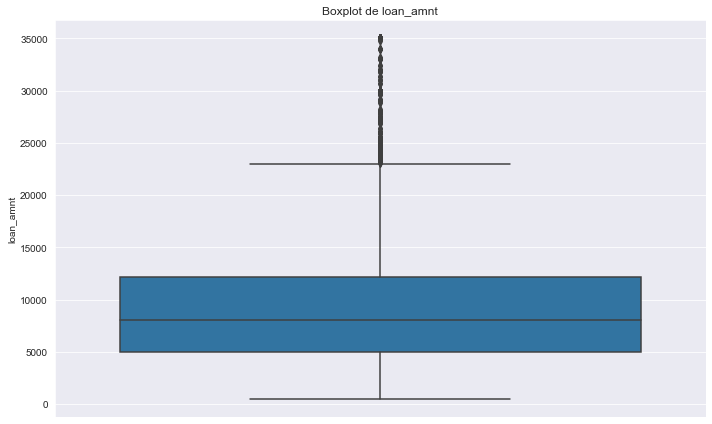

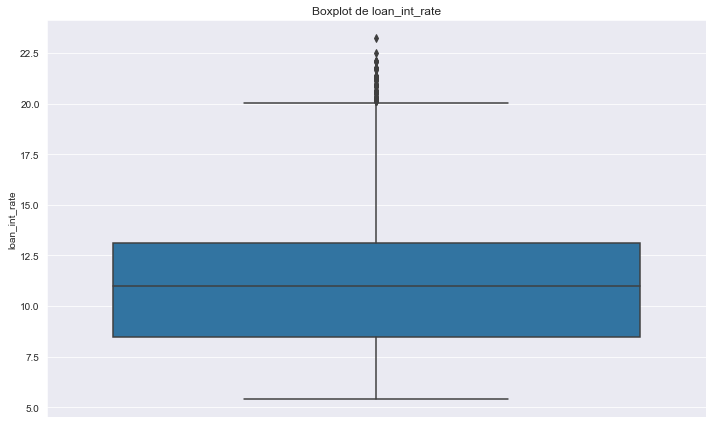

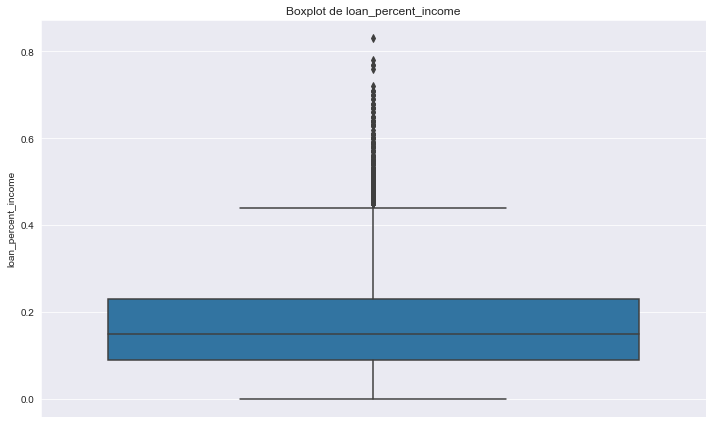

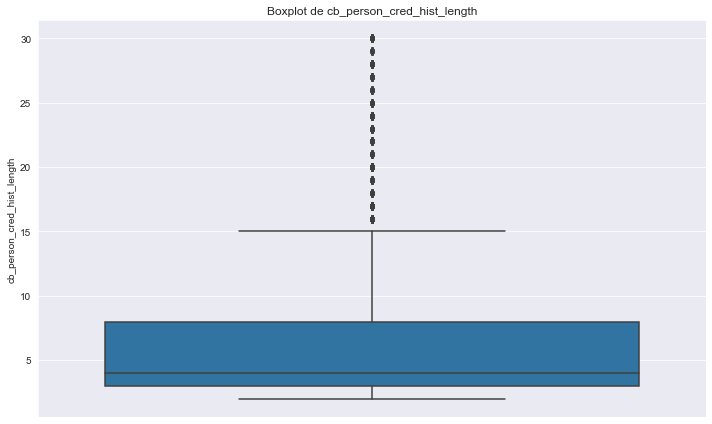

In [249]:
plot_box_plot(credit_quant)

In [250]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    ric = Q3 - Q1
    li = Q1 - (1.5 * ric)
    ls = Q3 + (1.5 * ric)
    return li, ls

In [251]:
columns_list = credit_quant.columns
for i in columns_list:
    valor = credit_quant[i]
    Q1, Q3 = valor.quantile([0.25,0.75])
    ric = Q3 - Q1
    li = Q1 - (1.5 * ric)
    ls = Q3 + (1.5 * ric)
    selecao = (valor <= li) | (valor >= ls)
    credit_quant_without_outlies = credit_total[selecao]

In [252]:
credit_quant.shape

(32581, 7)

In [253]:
credit_quant_without_outlies.shape

(1142, 12)

In [254]:
(credit_quant_without_outlies.shape[0] / credit_quant.shape[0]) * 100

3.5051103403824313

Diminuição de 96.5% da base de dados quantitativos, quando retirados os outliers, revendo para tirar valores que estão muito discrepantes

##### Variável Renda

<AxesSubplot:ylabel='person_income'>

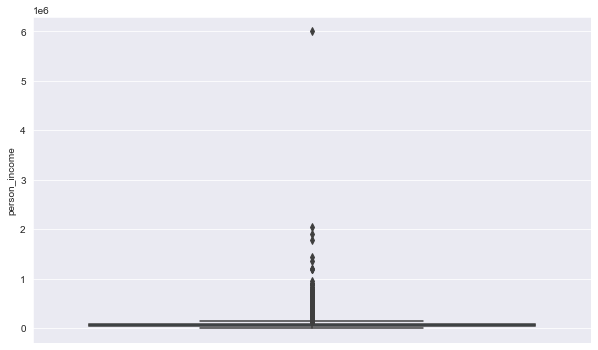

In [255]:
plt.figure(figsize = (10,6))
sns.boxplot(y = credit_quant.person_income, data = credit_quant) #retirar valores maiores que 100.000

In [256]:
def verify_superior_limit(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    ric = Q3 - Q1
    ls = Q3 + (1.5 * ric)
    return ls

In [257]:
ls = verify_superior_limit(credit_quant.person_income)
print(ls)

selecao = (credit_quant.person_income <= ls)
credit_quant_without_outlies = credit_total[selecao]

140250.0


In [258]:
credit_quant.shape

(32581, 7)

In [259]:
credit_quant_without_outlies.shape

(31097, 12)

<AxesSubplot:ylabel='person_income'>

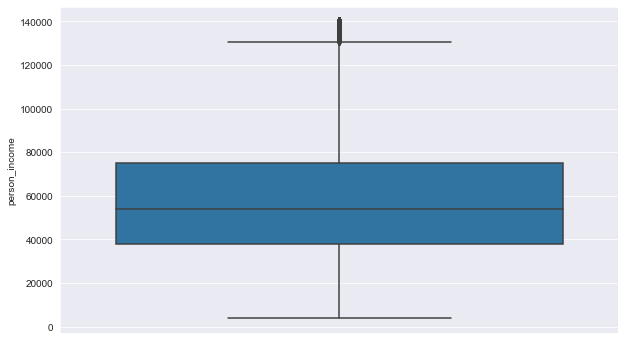

In [260]:
plt.figure(figsize = (10,6))
sns.boxplot(y = credit_quant_without_outlies.person_income, data = credit_quant_without_outlies)

##### Variável Idade

<AxesSubplot:ylabel='person_age'>

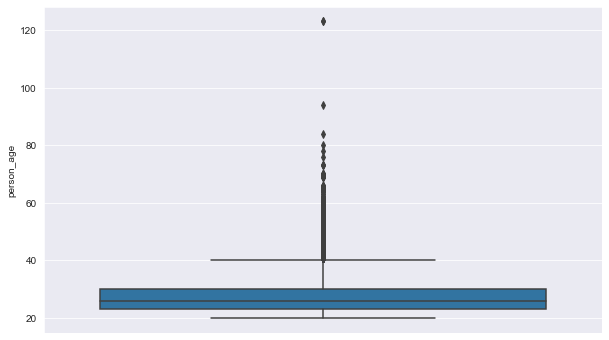

In [261]:
plt.figure(figsize = (10,6))
sns.boxplot(y = credit_quant_without_outlies.person_age, data = credit_quant_without_outlies) #retirar valores maiores que 80

In [262]:
ls = verify_superior_limit(credit_quant_without_outlies.person_age)
print(ls)

selecao = (credit_quant_without_outlies.person_age < ls)
credit_quant_without_outlies = credit_quant_without_outlies[selecao]

40.5


In [263]:
credit_quant_without_outlies.shape

(29724, 12)

<AxesSubplot:ylabel='person_age'>

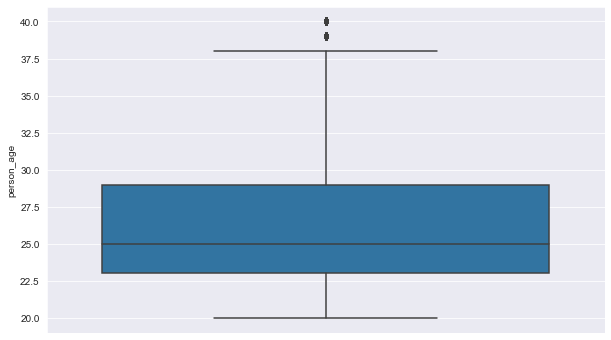

In [264]:
plt.figure(figsize = (10,6))
sns.boxplot(y = credit_quant_without_outlies.person_age, data = credit_quant_without_outlies) #retirar valores maiores que 80

##### Variável Tamanho do Empréstimo

<AxesSubplot:ylabel='person_emp_length'>

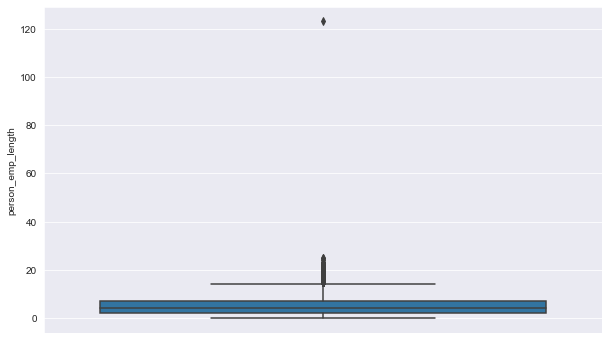

In [265]:
plt.figure(figsize = (10,6))
sns.boxplot(y = credit_quant_without_outlies.person_emp_length, data = credit_quant_without_outlies) #retirar valores maiores que 60

In [266]:
ls = verify_superior_limit(credit_quant_without_outlies.person_emp_length)
print(ls)

selecao = (credit_quant_without_outlies.person_emp_length < ls)
credit_quant_without_outlies = credit_quant_without_outlies[selecao]

14.5


In [267]:
credit_quant_without_outlies.shape

(29104, 12)

<AxesSubplot:ylabel='person_emp_length'>

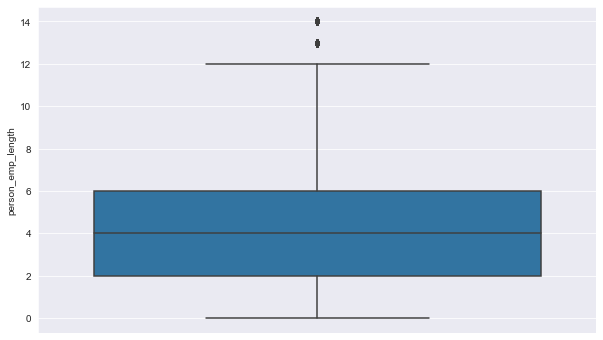

In [268]:
plt.figure(figsize = (10,6))
sns.boxplot(y = credit_quant_without_outlies.person_emp_length, data = credit_quant_without_outlies) #retirar valores maiores que 60

#### Correlações

<AxesSubplot:>

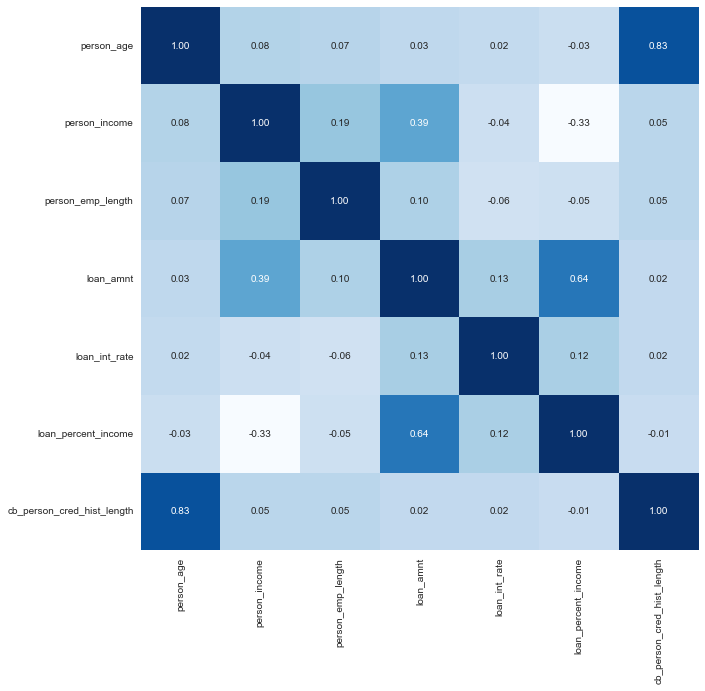

In [269]:
fig = plt.figure(figsize=(10,10))

corr = np.corrcoef(credit_quant_without_outlies[quant].values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=credit_quant_without_outlies[quant].columns, yticklabels=credit_quant_without_outlies[quant].columns)

Forte correlação entre as variáveis tamanho do histório de crédito da pessoa e idade

O que faz sentido que quanto mais idade a pessoa tem, mais chances de ter obtido mais empréstimos.

#### Padronização

In [270]:
from sklearn.preprocessing import StandardScaler

In [274]:
credit_standard = credit_quant_without_outlies[quant].copy()

In [275]:
credit_standard.iloc[:, :] = StandardScaler().fit_transform(credit_standard)

In [276]:
credit_standard.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
1,-1.263198,-1.779537,0.189271,-1.373342,0.044442,-0.697895,-0.975850
2,-0.354247,-1.779537,-1.008431,-0.624455,0.607447,3.691323,-0.668402
3,-0.808722,0.261946,-0.110155,4.284914,1.375476,3.317772,-0.975850
4,-0.581485,-0.143429,1.087547,4.284914,1.063058,3.504547,-0.360954
5,-1.263198,-1.768581,-0.709006,-1.123713,-1.257303,0.702919,-0.975850


### QUALITATIVAS

In [304]:
credit_quali = credit_quant_without_outlies[quali]

#### Correlações

In [305]:
for i in credit_quali.columns:
    credit_quali[i] = credit_quali[i].astype('category')

C:\Users\DESKTOP\AppData\Local\Temp/ipykernel_8952/839127694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_quali[i] = credit_quali[i].astype('category')


In [322]:
credit_quali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29104 entries, 1 to 32296
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   loan_status                29104 non-null  category
 1   person_home_ownership      29104 non-null  category
 2   loan_intent                29104 non-null  category
 3   loan_grade                 29104 non-null  category
 4   cb_person_default_on_file  29104 non-null  category
dtypes: category(5)
memory usage: 370.5 KB


In [323]:
credit_quali.columns

Index(['loan_status', 'person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [326]:
pd.crosstab(credit_quali['loan_status'], 'loan_status')

col_0,loan_status
loan_status,
0,22557
1,6547


In [324]:
tab = pd.crosstab(credit_quali['loan_status'], 'loan_intent')

In [327]:
chi2_contingency(tab.values)

(0.0,
 1.0,
 0,
 array([[22557.],
        [ 6547.]]))

In [314]:

chi2, p, dof, exp = chi2_contingency(tab.values)
print(p)

0.0


In [320]:
df_teste = pd.DataFrame(columns=credit_quali.columns)

df_teste['colunas'] = credit_quali.columns

df_teste = df_teste.set_index('colunas')

from scipy.stats import chi2_contingency

df = pd.DataFrame(columns=['column1', 'column2', 'p-value'])

for i in credit_quali.columns:
    for j in credit_quali.columns:
        lista_i = credit_quali[i]
        lista_j = j
        tab = pd.crosstab(lista_i, lista_j)
        chi2, p, dof, exp = chi2_contingency(tab.values)
        df_teste.loc[i,j] = p
        linha_df = {'column1': i, 'column2': j, 'p-value': p}
        df = df.append(linha_df, ignore_index=True)

df 

,column1,column2,p-value
0,loan_status,loan_status,1.0
1,loan_status,person_home_ownership,1.0
2,loan_status,loan_intent,1.0
3,loan_status,loan_grade,1.0
4,loan_status,cb_person_default_on_file,1.0
5,person_home_ownership,loan_status,1.0
6,person_home_ownership,person_home_ownership,1.0
7,person_home_ownership,loan_intent,1.0
8,person_home_ownership,loan_grade,1.0
9,person_home_ownership,cb_person_default_on_file,1.0


<AxesSubplot:>

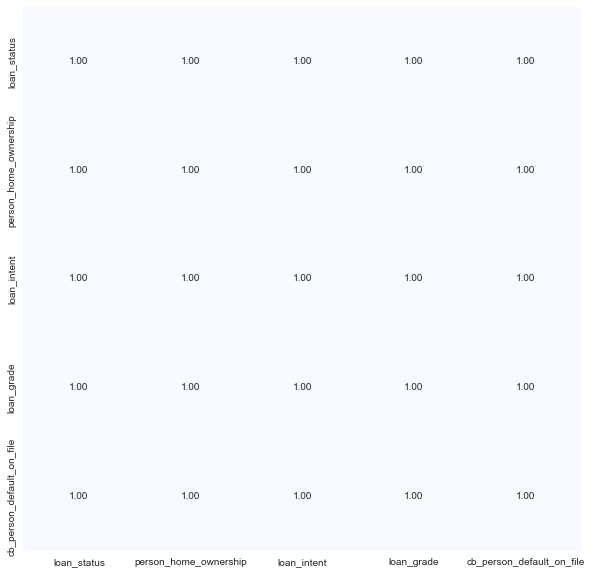

In [321]:
df_teste = df_teste.astype(float)

corr_quali = df_teste.values

fig = plt.figure(figsize=(10,10))

sns.heatmap(corr_quali, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=df_teste.columns, yticklabels=df_teste.columns)

#### Dummies